# VISUALISING THE DATASET AT HAND

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv("Movies.csv")
df = pd.DataFrame(movies)
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


## CLEANING DATASET AND MAKING IT FIT FOR VISUALISATION AND ANALYSIS

In [3]:
df.shape

(16744, 17)

In [4]:
df.isnull().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [5]:
col = ['Unnamed: 0', 'Rotten Tomatoes','Directors']
df.drop(col,axis=1,inplace=True)

In [6]:
df['Age'] = df['Age'].str.replace('+','')
df['Age'] = df['Age'].str.replace('all','0')

In [7]:
median = df['Age'].median()
df['Age'] = df['Age'].fillna(median)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(15532, 14)

In [10]:
df.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Genres,Country,Language,Runtime
0,1,Inception,2010,13,8.8,1,0,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18,8.7,1,0,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13,8.5,1,0,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7,8.5,1,0,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18,8.8,1,0,1,0,0,Western,"Italy,Spain,West Germany",Italian,161.0


In [11]:
df['Runtime'] = df['Runtime'].astype(int)
df['Age'] = df['Age'].astype(int)

In [12]:
df.Type.unique()

array([0], dtype=int64)

In [13]:
df.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Netflix', 'Hulu', 'Prime Video',
       'Disney+', 'Type', 'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [14]:
df.drop('Type',axis=1,inplace=True)

In [15]:
df.shape

(15532, 13)

## ANALYSING AND VISUALIZING DATASET ON THE BASIS OF IMDb RATINGS

In [16]:
df1 = df.groupby('IMDb')["Title"].count().reset_index()

In [17]:
def data_graph (axis, width, height):
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    for p in axis.patches:
        axis.annotate ("{0:.0f}".format(p.get_height()), (p.get_x()+width, p.get_height()+height))

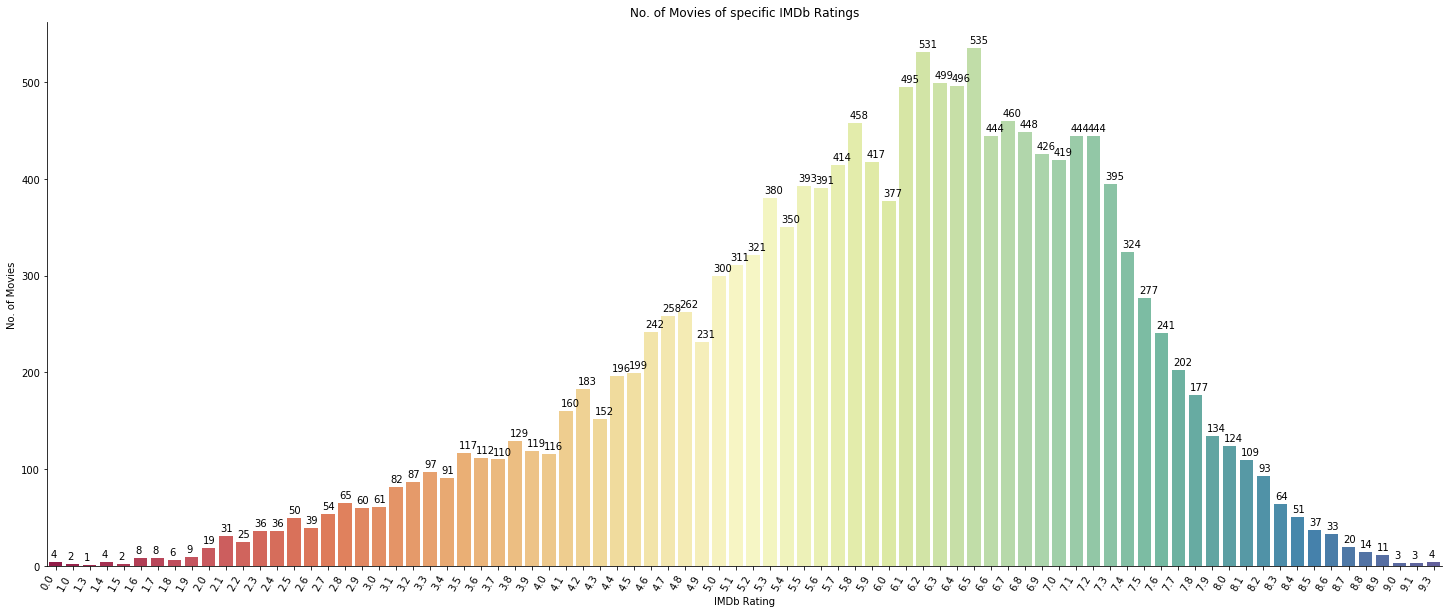

In [18]:
plt.figure(figsize = (25,10))
ax = sns.barplot(x="IMDb", y= "Title", data=df1 ,palette = "Spectral")
plt.title ("No. of Movies of specific IMDb Ratings")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("IMDb Rating")
plt.ylabel("No. of Movies")
data_graph(ax,0.08,5)
plt.show()

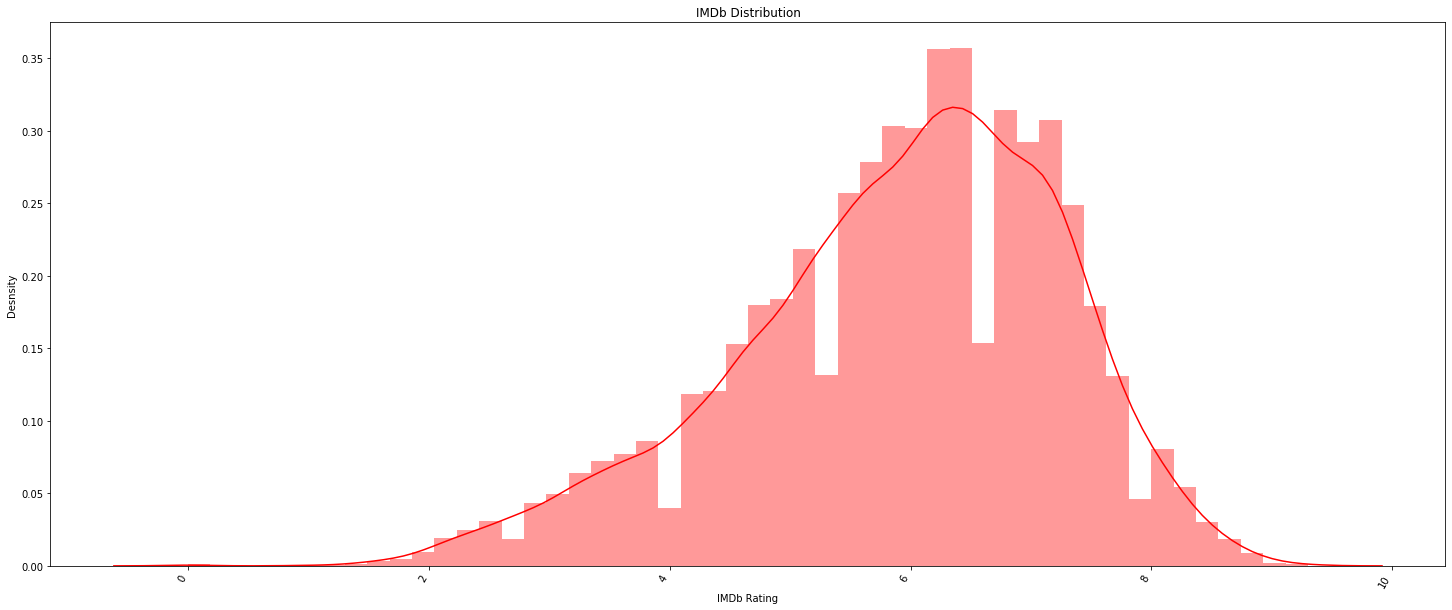

In [19]:
plt.figure(figsize = (25,10))
x = pd.Series(df["IMDb"])
ax = sns.distplot(x, color = 'r')
plt.title ("IMDb Distribution")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("IMDb Rating")
plt.ylabel("Desnsity")
plt.show()

## ANALYSING AND VISUALISING DATA ON THE BASIS OF YEAR

In [20]:
df2 = df.groupby('Year')["Title"].count().reset_index()

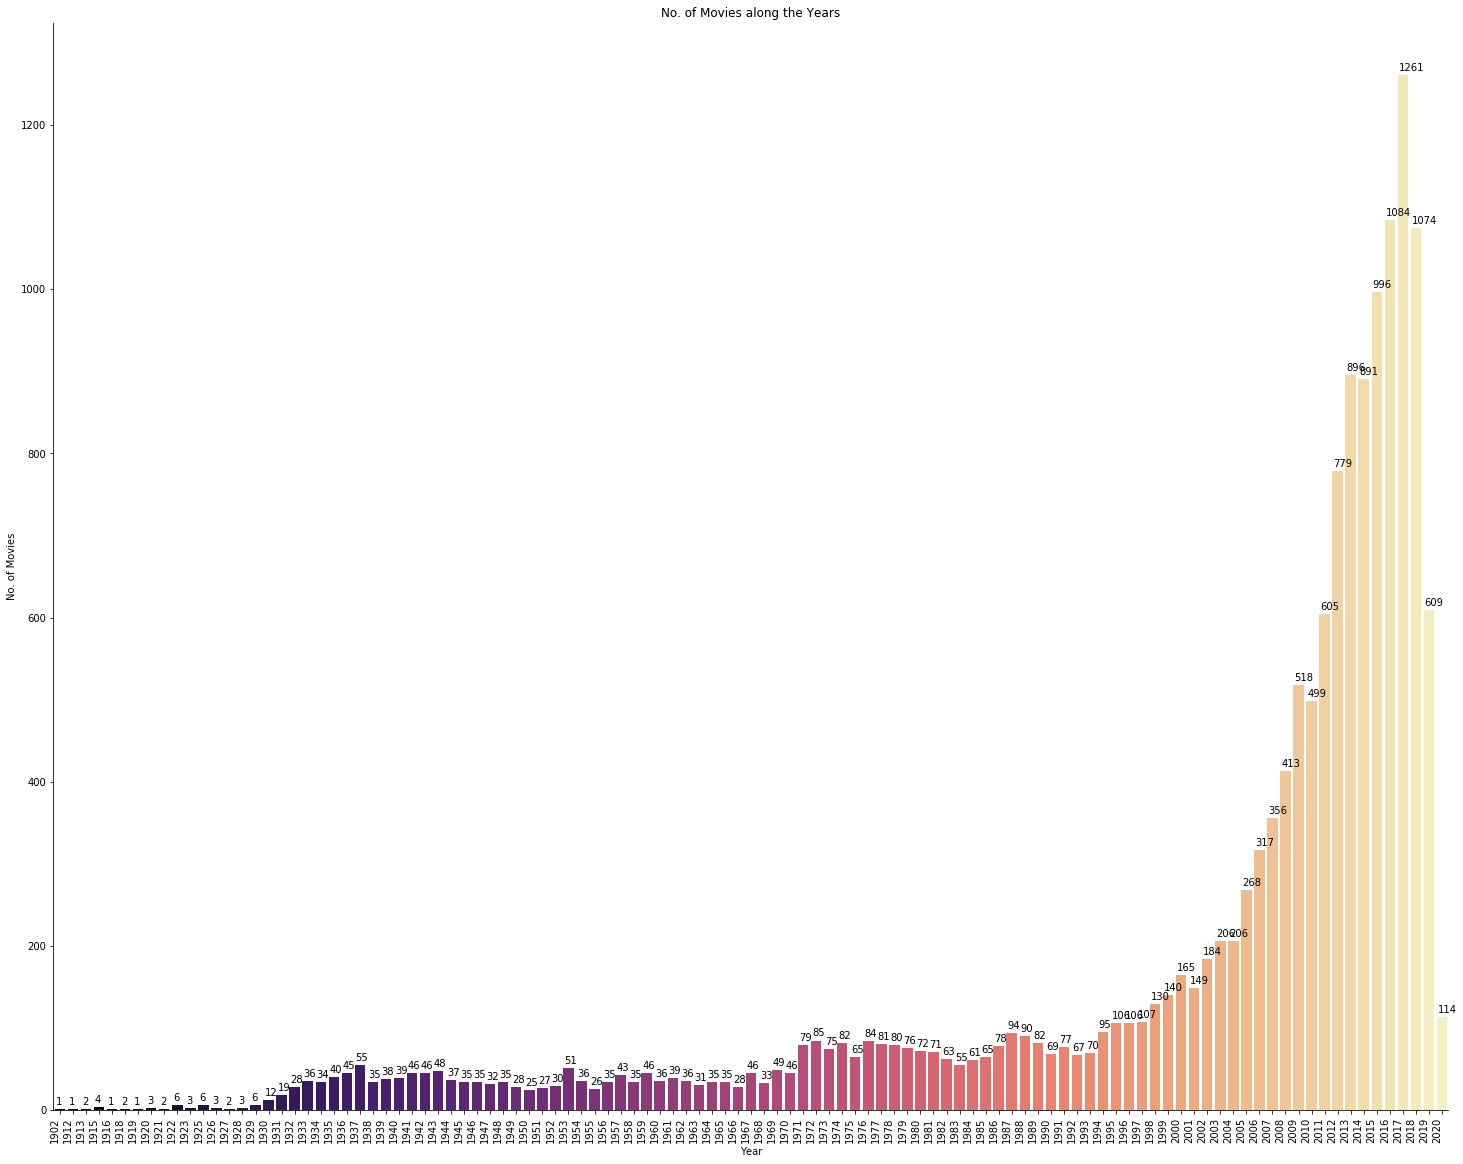

In [21]:
plt.figure(figsize = (25,20))
ax = sns.barplot(x="Year", y= "Title", data=df2 ,palette = "magma")
plt.title ("No. of Movies along the Years")
plt.xticks(rotation = 90, ha = 'right')
plt.xlabel("Year")
plt.ylabel("No. of Movies")
data_graph(ax,0.08,5)
plt.show()

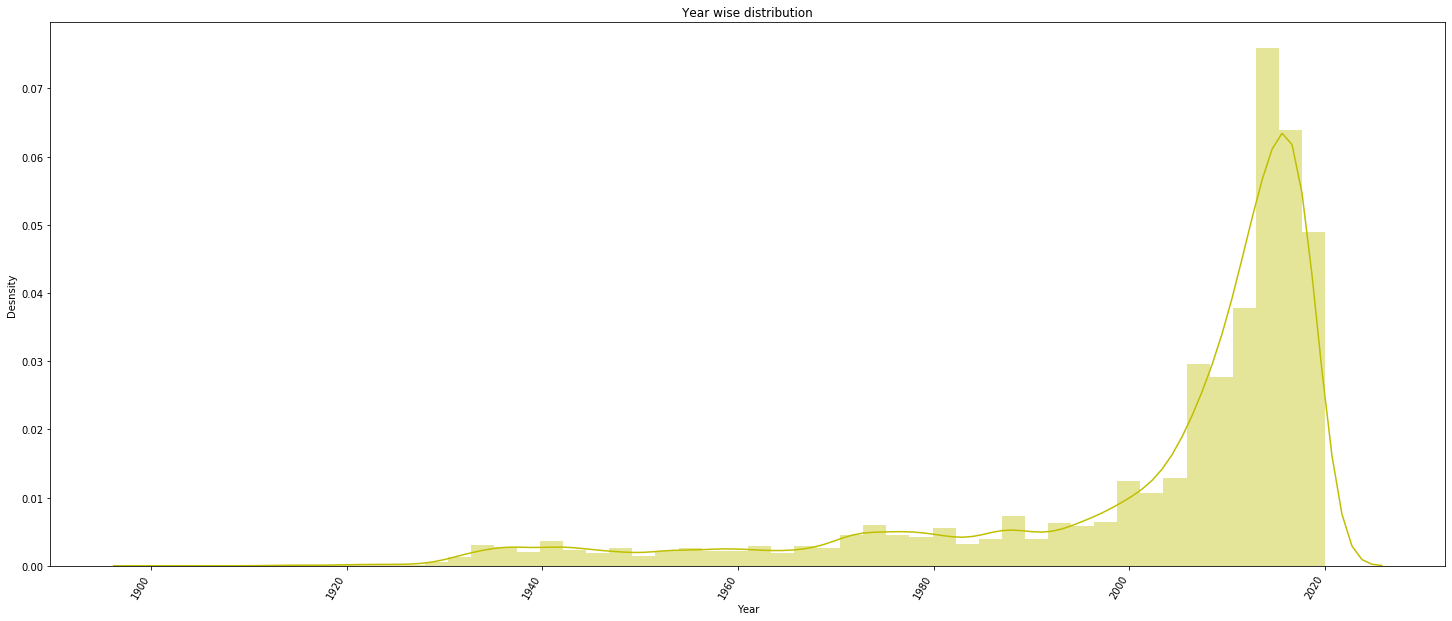

In [22]:
plt.figure(figsize = (25,10))
x = pd.Series(df["Year"])
ax = sns.distplot(x, color = 'y')
plt.title ("Year wise distribution")
plt.xticks(rotation = 60, ha = 'right')
plt.xlabel("Year")
plt.ylabel("Desnsity")
plt.show()

Creating a function that allows us to seperate out values of a particular column with multiple categorical values seperated by commas. 

In [23]:
def split_mulcol(x):
    res = x.to_frame()
    opt = []
    
    for i, j  in x[x.notnull()].iteritems():
        
        for k in j.split(','):
            
            if not k in res.columns:
                opt.append(k)
                res[k] = False
            
            res.at[i, k] = True
    
    return res[opt]

## ANALYSING AND VISUALIZING DATA ON THE BASIS OF LANGUAGE

In [24]:
lang = split_mulcol(df["Language"])
lang = lang.sum().sort_values(ascending=False).reset_index()
lang = pd.DataFrame(lang.values, columns=['Language',"No. of Movies"])

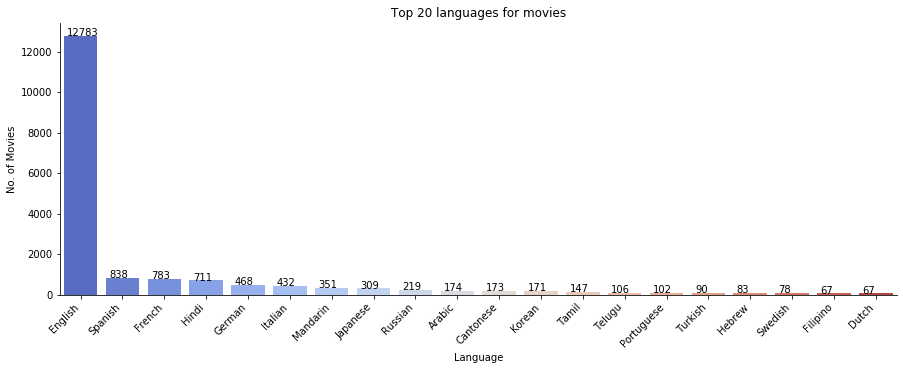

In [25]:
plt.figure(figsize = (15,5))
lang = lang[:20]
ax = sns.barplot(x=lang["Language"], y= lang["No. of Movies"], data=lang ,palette = "coolwarm")
plt.title ("Top 20 languages for movies")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Language")
plt.ylabel("No. of Movies")
data_graph(ax,0.08,5)
plt.show()

## ANALYSING AND VISUALIZING DATA ON THE BASIS OF GENRE

In [26]:
genres = split_mulcol(df["Genres"])
genres = genres.sum().sort_values(ascending=False).reset_index()
genres = pd.DataFrame(genres.values, columns=['Genre',"No. of Movies"])
genres = genres[:20]

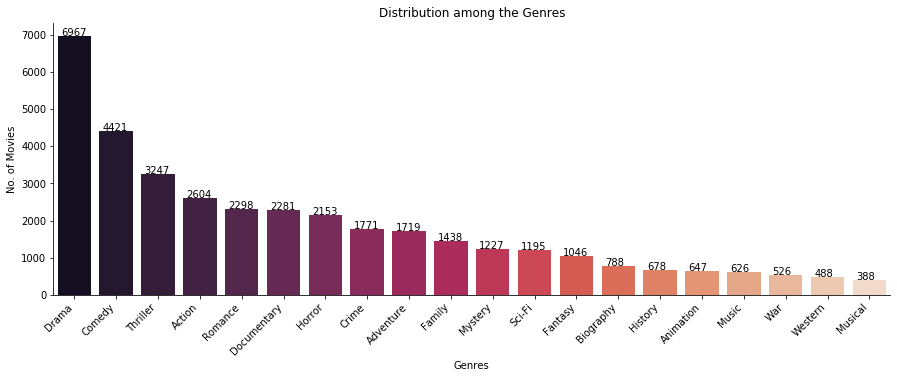

In [27]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x=genres["Genre"], y= genres["No. of Movies"], data=genres , palette = "rocket")
plt.title ("Distribution among the Genres")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Genres")
plt.ylabel("No. of Movies")
data_graph(ax,0.08,5)
plt.show()

## UNDERSTANDING AND VISUALIZING THE PERCENTAGE AND THE YEAR WISE DISTRIBUTION OF THE MOVIES AMONG THE PLATFORMS AVAILABLE IN THE DATASET

In [28]:
plat_dist = df[["Netflix","Hulu","Prime Video","Disney+"]].sum().sort_values(ascending=False).reset_index()
plat_dist = pd.DataFrame(plat_dist.values, columns=['Platform',"No. of Movies"])

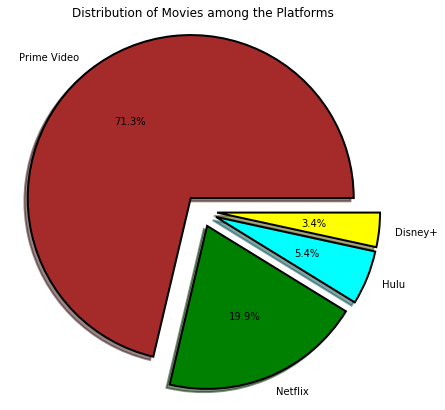

In [29]:
plt.figure(figsize=(7,7))
dt = plat_dist["No. of Movies"]
labels = plat_dist["Platform"]
exp = (0.1,0.1,0.1,0.1)
clr = ( "brown", "green", "cyan", "yellow")
wp = { 'linewidth' : 2, 'edgecolor' : "black" }
plt.pie(dt,labels=labels,autopct='%1.1f%%',explode=exp, colors=clr,shadow=True, wedgeprops=wp)
plt.title('Distribution of Movies among the Platforms')
plt.axis('equal')
plt.show()

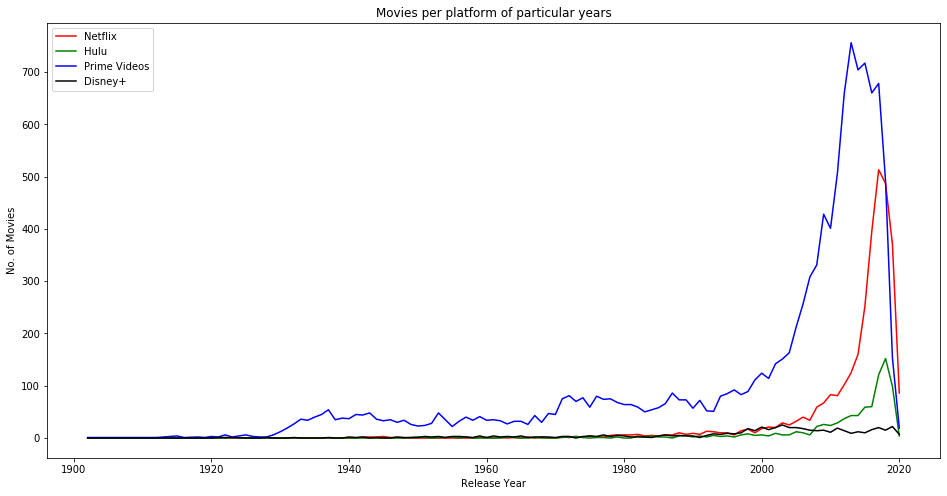

In [30]:
# mpppy => movies per platform per year
mpppy = df.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()
plt.figure(figsize = (16, 8))
sns.lineplot(x=mpppy.index,y=mpppy['Netflix'], color='red', label='Netflix')
sns.lineplot(x=mpppy.index,y=mpppy['Hulu'], color = 'green', label='Hulu')
sns.lineplot(x=mpppy.index,y=mpppy['Prime Video'], color = 'blue', label='Prime Videos')
sns.lineplot(x=mpppy.index,y=mpppy['Disney+'], color = 'black', label='Disney+')
plt.title("Movies per platform of particular years")
plt.legend()
plt.xlabel('Release Year')
plt.ylabel('No. of Movies')
plt.show()

## VISUALIZING THE TOP 50 MOVIES WITH THE HIGHEST RUNTIME

In [31]:
df_run = df[['Title','Runtime']].sort_values('Runtime',ascending=False)
df_run = df_run[:50]

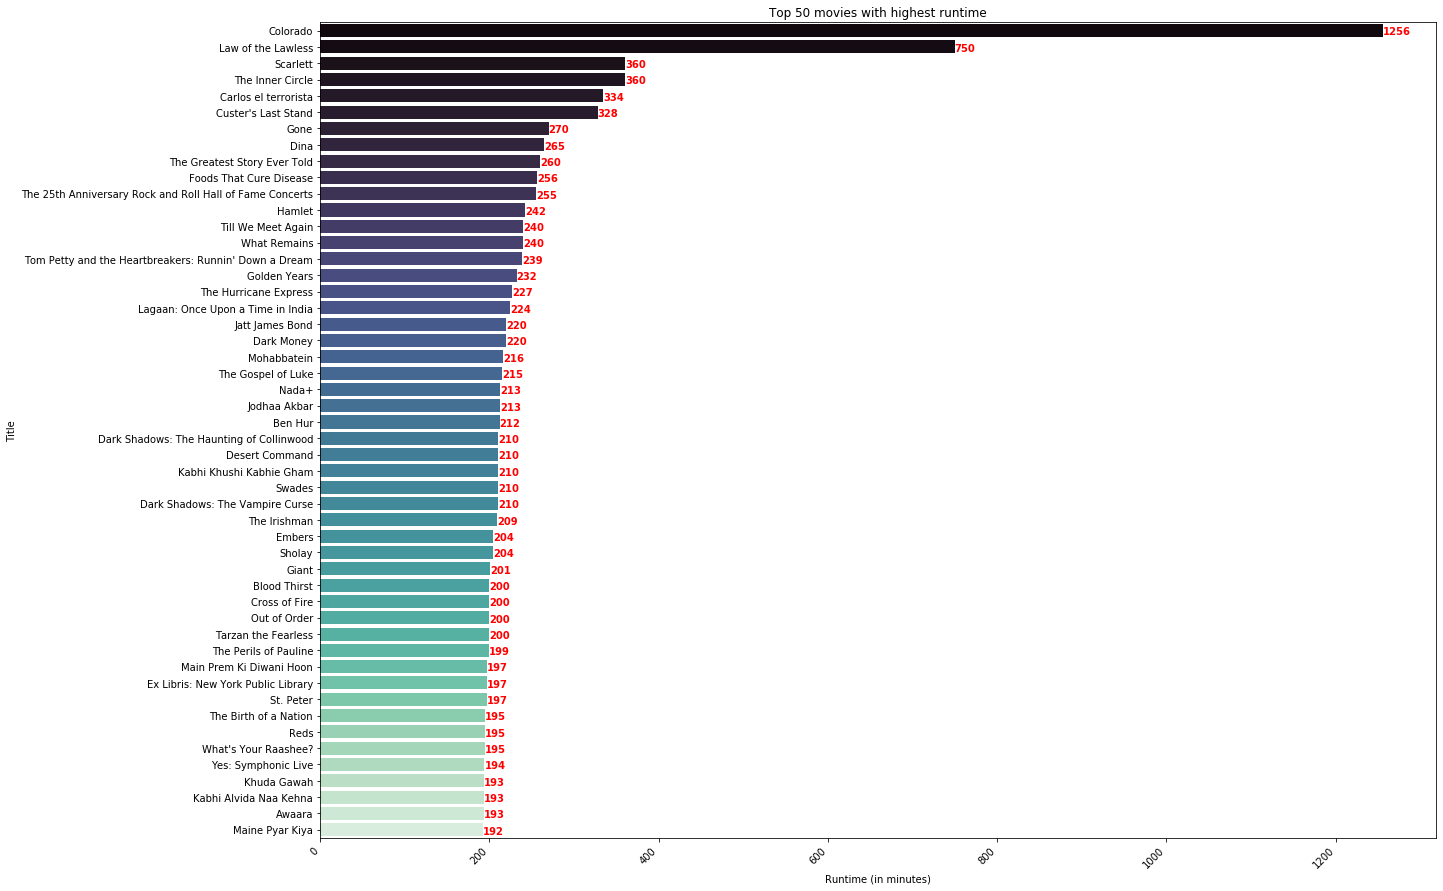

In [32]:
plt.figure(figsize = (20,15))
ax = sns.barplot(y=df_run["Title"], x= df_run["Runtime"], data=df_run , palette = "mako")
plt.title ("Top 50 movies with highest runtime")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Runtime (in minutes)")
plt.ylabel("Title")
for i, j in enumerate(df_run["Runtime"]):
    ax.text(j, i + .25, str(j), color = 'red', fontweight = 'bold')
plt.show()

## UNDERSTANDING COUNTRY WISE DISTRIBUTION

In [33]:
cont = split_mulcol(df["Country"])
cont = cont.sum().sort_values(ascending=False).reset_index()
cont = pd.DataFrame(cont.values, columns=['Country',"No. of Movies"])
cont = cont[:30]

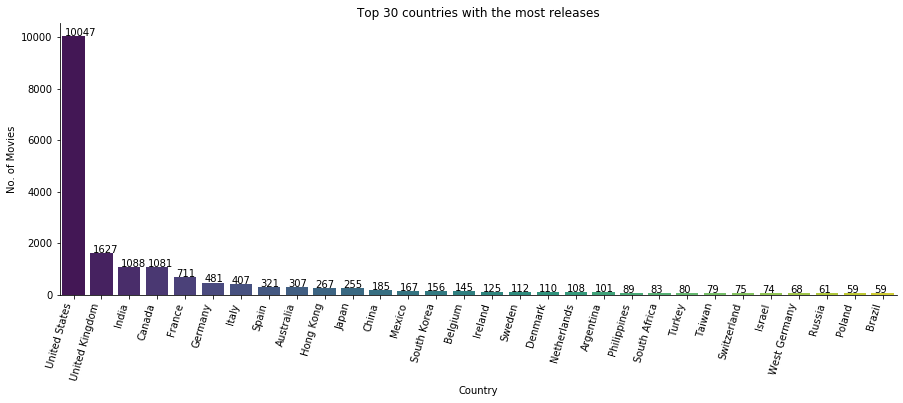

In [34]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x=cont["Country"], y= cont["No. of Movies"], data=cont , palette = "viridis")
plt.title ("Top 30 countries with the most releases")
plt.xticks(rotation = 74, ha = 'right')
plt.xlabel("Country")
plt.ylabel("No. of Movies")
data_graph(ax,0.08,5)
plt.show()

## UNDERSTANDING AGE WISE DISTRIBUTION

In [35]:
df_age = df.Age.value_counts().reset_index()
df_age = pd.DataFrame(df_age.values, columns = ['Age', "No. of Movies"]).sort_values('No. of Movies',ascending=False)

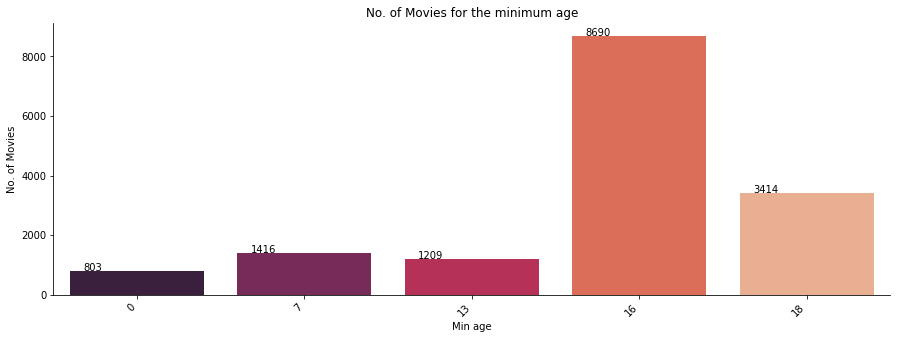

In [36]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x=df_age["Age"], y= df_age["No. of Movies"], data=df , palette = "rocket")
plt.title ("No. of Movies for the minimum age")
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Min age")
plt.ylabel("No. of Movies")
data_graph(ax,0.08,5)
plt.show()